### Importing libraries

In [1]:
from random import randint

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras import layers
from tensorflow import keras

### Loading dataset
#### A-Z Handwritten Alphabets

Source: https://www.kaggle.com/sachinpatel21/az-handwritten-alphabets-in-csv-format

In [2]:
alphabets_data = pd.read_csv('datasets/A_Z Handwritten Data.csv', header=None)

alphabets_data.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
52610,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
144056,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47185,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
221058,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
148868,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45620,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
289716,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
180819,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
333351,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
214323,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
alphabets_data.shape

(372451, 785)

In [4]:
alphabets_data = alphabets_data.sample(frac=0.05).reset_index(drop=True)

alphabets_data.shape

(18623, 785)

In [5]:
sorted(alphabets_data[0].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25]

### Creating lookup

In [6]:
lookup = { 0: 'A', 1: 'B', 2: 'C', 3: 'D', 
           4: 'E', 5: 'F', 6: 'G', 7: 'H', 
           8: 'I', 9: 'J',10: 'K', 11: 'L', 
          12: 'M', 13: 'N', 14: 'O', 15: 'P', 
          16: 'Q', 17: 'R', 18: 'S',19: 'T', 
          20: 'U', 21: 'V', 22: 'W', 23: 'X', 
          24: 'Y', 25: 'Z'}

In [7]:
features = alphabets_data[alphabets_data.columns[1:]]

target = alphabets_data[0]

In [8]:
features.shape

(18623, 784)

In [9]:
features = features.values.reshape(len(features), 28, 28)

In [10]:
features.shape

(18623, 28, 28)

In [11]:
target.loc[10]

18

In [12]:
features[10][10:20]

array([[  0,   0,   0,   0,   0,   0,   0,   0,  30, 143, 232, 255, 244,
        159,  74,  59,  58,  36,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  14, 178, 252, 255, 255, 255,
        255, 255, 255, 255, 247, 229, 171,  44,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   9, 140, 229, 251, 221, 176,
        157, 157, 157, 168, 203, 244, 248, 191,  62,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  23,  47,  22,   0,
          0,   0,   0,   0,   3,  62, 197, 238, 149,   6,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  19, 116, 255, 209,  40,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  19, 116, 255, 209,  40,   0,   0,   0,
          0,   0],
       [  

### Displaying image

In [13]:
def show_image(features, actual_label):
    
    print("Actual label: ", lookup[actual_label])
    plt.imshow(features, cmap='Greys')
    
    plt.show()

Actual label:  S


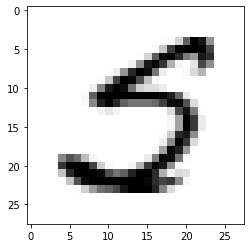

In [14]:
show_image(features[10], target[10])

Actual label:  S


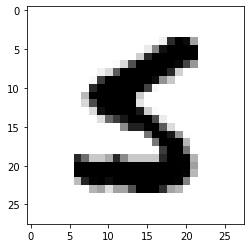

In [15]:
show_image(features[20], target[20])

#### Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255

In [16]:
features = features.astype(np.float32) / 255

In [17]:
features[10][10:20]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.11764706, 0.56078434,
        0.9098039 , 1.        , 0.95686275, 0.62352943, 0.2901961 ,
        0.23137255, 0.22745098, 0.14117648, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.05490196, 0.69803923, 0.9882353 ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.96862745, 0.8980392 , 0.67058825,
        0.17254902, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.03529412, 0.54901963, 0.8980392 ,
        0.9843137 , 0.8666667 , 0.6901961 , 0.6156863 , 0.6156863 ,
        0.6156863 , 0.6588

### Splitting dataset into training and testing data

In [18]:
from sklearn.model_selection import train_test_split

train_images, test_images, train_labels, test_labels = train_test_split(features,
                                                                        target,
                                                                        test_size=0.2)

In [19]:
train_images.shape

(14898, 28, 28)

In [20]:
test_images.shape

(3725, 28, 28)

### Bulilding stacked encoder

In [21]:
stacked_encoder = tf.keras.models.Sequential([
    
    layers.Flatten(input_shape=[28, 28]),

    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    
    layers.Dense(16, activation="relu")
])

In [22]:
stacked_encoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
Total params: 52,848
Trainable params: 52,848
Non-trainable params: 0
_________________________________________________________________


### Building stacked decoder

In [23]:
stacked_decoder = tf.keras.models.Sequential([
    
    layers.Dense(32, activation="relu", input_shape=[16]),

    layers.Dense(64, activation="relu"),
    
    layers.Dense(28 * 28, activation="relu"),
                                           
    layers.Reshape([28, 28])
])

In [24]:
stacked_decoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 784)               50960     
_________________________________________________________________
reshape (Reshape)            (None, 28, 28)            0         
Total params: 53,616
Trainable params: 53,616
Non-trainable params: 0
_________________________________________________________________


### Building autoencoder with encoder and decoder

In [25]:
ae_model = tf.keras.models.Sequential([stacked_encoder, stacked_decoder])

ae_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 16)                52848     
_________________________________________________________________
sequential_1 (Sequential)    (None, 28, 28)            53616     
Total params: 106,464
Trainable params: 106,464
Non-trainable params: 0
_________________________________________________________________


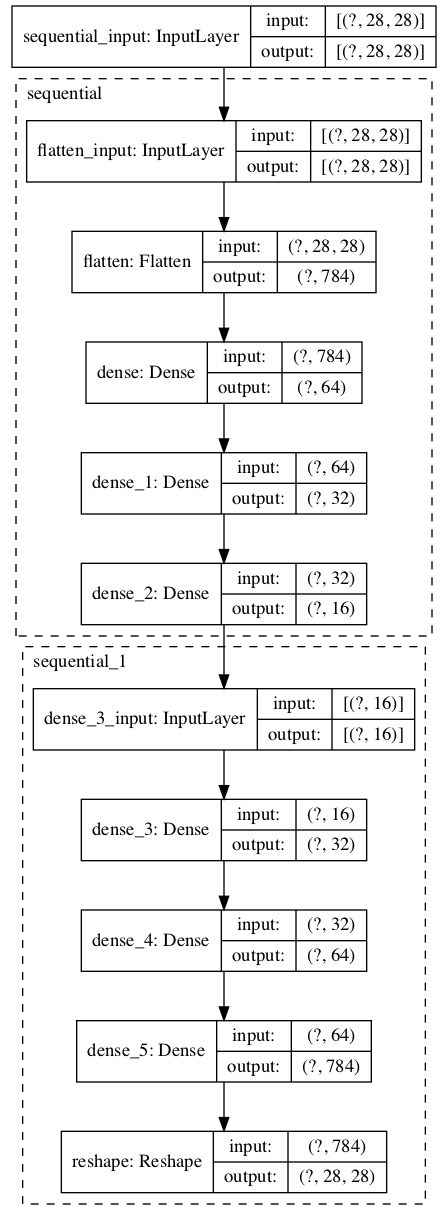

In [26]:
keras.utils.plot_model(ae_model, expand_nested=True, show_shapes=True)

In [27]:
ae_model.compile(loss='mean_squared_error',
                 optimizer=tf.keras.optimizers.RMSprop(), 
                 metrics=['mse'])

### Training autoencoder

In [28]:
training_hist = ae_model.fit(train_images, 
                             train_images, 
                             epochs=20)

Train on 14898 samples
Epoch 1/20
14898/14898 [==============================] - 2s 160us/sample - loss: 0.0636 - mse: 0.0636
Epoch 2/20
14898/14898 [==============================] - 2s 111us/sample - loss: 0.0452 - mse: 0.0452s - loss: 0.0454 - mse: 0.0
Epoch 3/20
14898/14898 [==============================] - 2s 110us/sample - loss: 0.0395 - mse: 0.0395s - loss: 0.0396 - mse: 0.0
Epoch 4/20
14898/14898 [==============================] - 2s 113us/sample - loss: 0.0364 - mse: 0.0364
Epoch 5/20
14898/14898 [==============================] - 2s 110us/sample - loss: 0.0347 - mse: 0.0347
Epoch 6/20
14898/14898 [==============================] - 2s 122us/sample - loss: 0.0334 - mse: 0.0334
Epoch 7/20
14898/14898 [==============================] - 2s 112us/sample - loss: 0.0322 - mse: 0.0322
Epoch 8/20
14898/14898 [==============================] - 2s 117us/sample - loss: 0.0314 - mse: 0.0314
Epoch 9/20
14898/14898 [==============================] - 2s 117us/sample - loss: 0.0305 - mse: 0.0

### Reconstructing image

In [29]:
def reconstruct_img(model, images, n_imgs):
    
    random_int = randint(0, images.shape[0] - n_imgs)
    
    reconstructions = model.predict(images[random_int : random_int + n_imgs])
    
    fig = plt.figure(figsize=(n_imgs * 3, 3))
    
    for img_index in range(n_imgs):
        plt.subplot(2, n_imgs, 1 + img_index)
        plt.imshow(images[random_int + img_index], cmap='Greys')
        
        plt.subplot(2, n_imgs, 1 + n_imgs + img_index)
        plt.imshow(reconstructions[img_index], cmap='Greys')

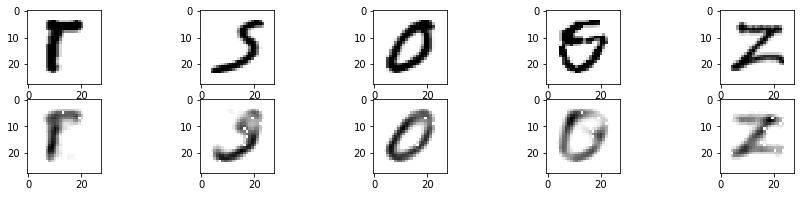

In [30]:
reconstruct_img(ae_model, test_images, 5)

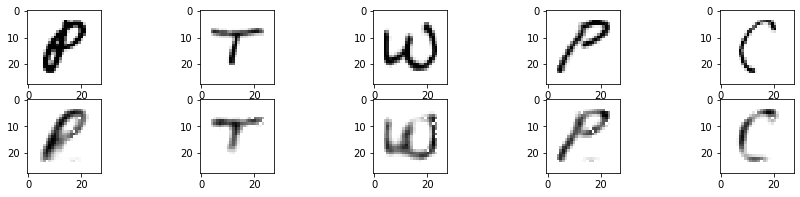

In [31]:
reconstruct_img(ae_model, test_images, 5)

### Building autoencoder using Convolutional layers

https://github.com/ageron/handson-ml2/blob/master/17_autoencoders_and_gans.ipynb

In [32]:
conv_encoder = tf.keras.models.Sequential([
    
    layers.Reshape([28, 28, 1], input_shape=[28, 28]),      
    
    layers.Conv2D(16, kernel_size=3, padding="SAME", activation="relu"),
    layers.MaxPool2D(pool_size=2),
    
    layers.Conv2D(32, kernel_size=3, padding="SAME", activation="relu"),
    layers.MaxPool2D(pool_size=2),
    
    layers.Conv2D(64, kernel_size=3, padding="SAME", activation="relu"),
    layers.MaxPool2D(pool_size=2)
])

In [33]:
conv_encoder.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)         

### Building decoder

In [34]:
conv_decoder = tf.keras.models.Sequential([

    layers.Conv2DTranspose(32, kernel_size=3, strides=2, 
                           padding="VALID", activation="relu",
                           input_shape=[3, 3, 64]),
    
    layers.Conv2DTranspose(16, kernel_size=3, strides=2, 
                           padding="SAME", activation="relu"),

    layers.Conv2DTranspose(1, kernel_size=3, strides=2, 
                           padding="SAME", activation="sigmoid"),
    
    layers.Reshape([28, 28])
])

In [35]:
conv_decoder.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_transpose (Conv2DTran (None, 7, 7, 32)          18464     
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 14, 14, 16)        4624      
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 28, 28, 1)         145       
_________________________________________________________________
reshape_2 (Reshape)          (None, 28, 28)            0         
Total params: 23,233
Trainable params: 23,233
Non-trainable params: 0
_________________________________________________________________


In [36]:
conv_ae_model = tf.keras.models.Sequential([conv_encoder, conv_decoder])

conv_ae_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_3 (Sequential)    (None, 3, 3, 64)          23296     
_________________________________________________________________
sequential_4 (Sequential)    (None, 28, 28)            23233     
Total params: 46,529
Trainable params: 46,529
Non-trainable params: 0
_________________________________________________________________


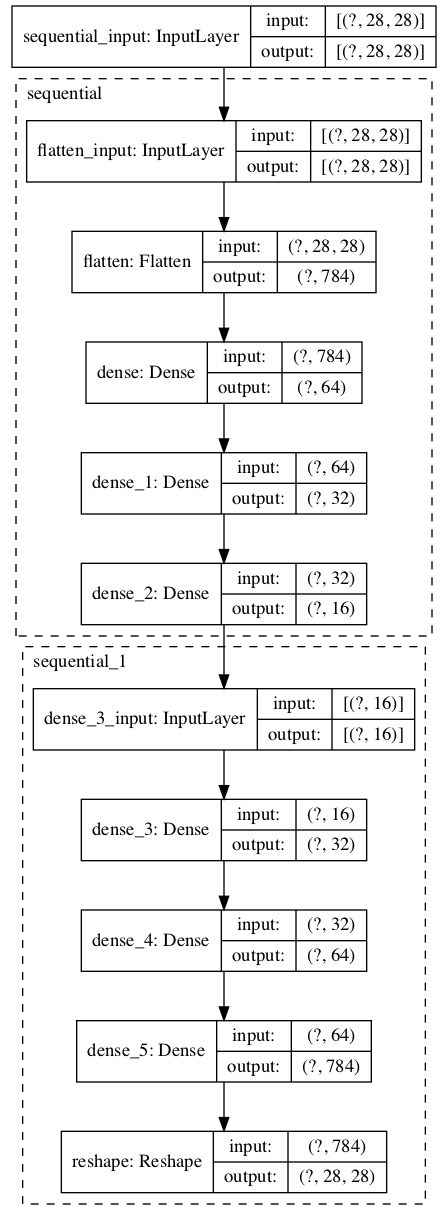

In [37]:
keras.utils.plot_model(ae_model, expand_nested=True, show_shapes=True)

In [38]:
conv_ae_model.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
                      optimizer=tf.keras.optimizers.SGD(lr=1.0),
                      metrics=['accuracy'])

### Training autoencoder build by convolutional layers

In [39]:
training_hist_convAE = conv_ae_model.fit(train_images, train_images, epochs=10)

Train on 14898 samples
Epoch 1/10
14898/14898 [==============================] - 11s 736us/sample - loss: 0.2706 - accuracy: 0.7946
Epoch 2/10
14898/14898 [==============================] - 12s 807us/sample - loss: 0.1434 - accuracy: 0.8297
Epoch 3/10
14898/14898 [==============================] - 11s 763us/sample - loss: 0.1248 - accuracy: 0.8350
Epoch 4/10
14898/14898 [==============================] - 15s 1ms/sample - loss: 0.1163 - accuracy: 0.8369
Epoch 5/10
14898/14898 [==============================] - 21s 1ms/sample - loss: 0.1109 - accuracy: 0.8380
Epoch 6/10
14898/14898 [==============================] - 25s 2ms/sample - loss: 0.1073 - accuracy: 0.8387
Epoch 7/10
14898/14898 [==============================] - 23s 2ms/sample - loss: 0.1046 - accuracy: 0.8391
Epoch 8/10
14898/14898 [==============================] - 26s 2ms/sample - loss: 0.1027 - accuracy: 0.8394
Epoch 9/10
14898/14898 [==============================] - 20s 1ms/sample - loss: 0.1008 - accuracy: 0.8396
Epoch 10

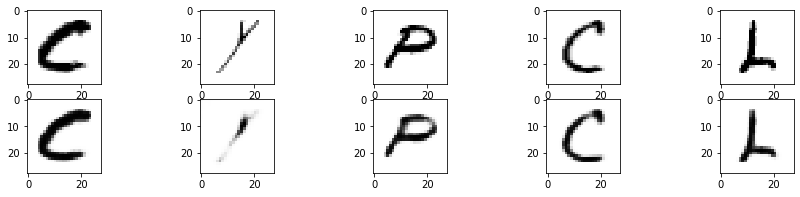

In [40]:
reconstruct_img(conv_ae_model, test_images, 5)

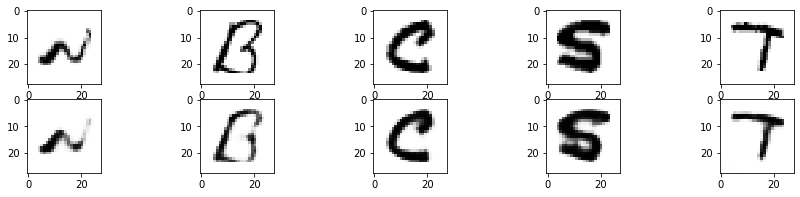

In [41]:
reconstruct_img(conv_ae_model, test_images, 5)